MNE : From raw data to epochs and evoked responses (ERF/ERP)
============================================================

`
Authors:
Alexandre Gramfort
Denis A. Engemann
`

In [2]:
# add plot inline in the page
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

First, load the mne package:

In [5]:
import mne
mne.pick_types?

We set the log-level to 'WARNING' so the output is less verbose

In [6]:
mne.set_log_level('WARNING')

## Access raw data

Now we import the sample dataset. If you don't already have it, it will be downloaded automatically (but be patient approx. 2GB)

In [5]:
from mne.datasets import sample
# also explore other datasets, e.g. mne.datasets.XXX
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
print raw_fname

/Users/dengemann/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


In [8]:
print raw_fname

/Users/dengemann/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


Read data from file:

In [7]:
raw = mne.io.Raw(raw_fname, preload=False)

print raw

Opening raw data file /Users/dengemann/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
Current compensation grade : 0
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
<RawFIF  |  n_channels x n_times : 376 x 41700>


In [10]:
raw.ch_names[315:315 + 3]

['EEG 001', 'EEG 002', 'EEG 003']

In [8]:
# print raw.info
print raw.proj

False


Look at the channels in raw:

In [12]:
print raw.ch_names[:5]

['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123']


In [13]:
data, times = raw[:, :10]
print data.shape

(376, 10)


# plotting the hard way

Read and plot a segment of raw data

In [14]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:306, start:stop]
print data.shape
print times.shape
print times.min(), times.max()

(306, 2252)
(2252,)
99.9975041858 114.988805013


In [15]:
# picks = mne.pick_types(raw.info, meg='mag', exclude=[])
# print pick

Take some magnetometer data and plot it

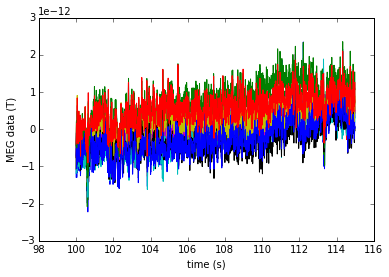

In [16]:
picks = mne.pick_types(raw.info, meg='mag', exclude=[])
data, times = raw[picks[:10], start:stop]

import matplotlib.pyplot as plt
plt.plot(times, data.T)
plt.xlabel('time (s)')
plt.ylabel('MEG data (T)')


# ... or use MNE plotters

In [9]:
%matplotlib qt4

raw.plot();

Reading 0 ... 1500  =      0.000 ...     9.990 secs...
[done]
Reading 338 ... 1838  =      2.251 ...    12.241 secs...
[done]
Reading 1839 ... 3340  =     12.247 ...    22.244 secs...
[done]
Reading 3341 ... 4841  =     22.251 ...    32.240 secs...
[done]
Reading 4842 ... 6343  =     32.247 ...    42.243 secs...
[done]
Reading 6344 ... 7844  =     42.250 ...    52.240 secs...
[done]
Reading 7845 ... 9346  =     52.246 ...    62.243 secs...
[done]
Reading 9347 ... 10847  =     62.250 ...    72.239 secs...
[done]
Reading 10848 ... 12349  =     72.246 ...    82.242 secs...
[done]
Reading 12350 ... 13851  =     82.249 ...    92.245 secs...
[done]
Reading 13852 ... 15352  =     92.252 ...   102.242 secs...
[done]
Reading 15353 ... 16854  =    102.249 ...   112.245 secs...
[done]
Reading 16855 ... 18355  =    112.252 ...   122.241 secs...
[done]
Reading 18356 ... 19857  =    122.248 ...   132.244 secs...
[done]
Reading 19858 ... 21358  =    132.251 ...   142.241 secs...
[done]
Reading 21359 

In [19]:
len(mne.pick_types(raw.info, meg=False, eeg=True, exclude='bads'))


59

In [20]:
raw.info['bads']

[u'MEG 2443', u'EEG 053']

Save a segment of 150s of raw data (MEG only):

In [21]:
picks = mne.pick_types(raw.info, meg=True, eeg=False, stim=True, exclude=[])
raw.save('sample_audvis_meg_raw.fif', tmin=0., tmax=150., picks=picks, overwrite=True)

Filtering:

In [22]:
raw_beta = mne.io.Raw(raw_fname, preload=True)  # reload data with preload for filtering

# keep beta band
raw_beta.filter(13.0, 30.0, method='iir')

# save the result
raw_beta.save('sample_audvis_beta_raw.fif', overwrite=True)

print raw_beta.info

<Info | 20 non-empty fields
    bads : list | MEG 2443, EEG 053
    buffer_size_sec : numpy.float64 | 13.3196808772
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (EOG: 1, EEG: 60, STIM: 9, GRAD: 204, MAG: 102)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : dict | 3 items
    dig : list | 146 items
    events : list | 0 items
    file_id : dict | 4 items
    filename : unicode | /Users/den.../sample_audvis_filt-0-40_raw.fif
    highpass : float | 13.0
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 30.0
    meas_date : numpy.ndarray | 2002-12-03 20:01:10
    meas_id : dict | 4 items
    nchan : int | 376
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off, ...
    sfreq : float | 150.153747559
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    hpi_su

## Exercise :

- Filter the raw data between 1Hz and 40Hz. Observe the absence of the slow drifts.
- Plot the magnetometers and the gradiometers separately. Observe the different units.

## Define and read epochs

First extract events:

In [10]:
events = mne.find_events(raw, stim_channel='STI 014')

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
[done]
319 events found
Events id: [ 1  2  3  4  5 32]


In [11]:
# See parameters to fine tune event detection, e.g. consecutive non-zero
# mne.find_events?

In [14]:
print events[:5]  # events is a 2d array

[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


In [16]:
len(events[events[:, 2] == 2])

[ True False False False  True False False False  True False False False
  True False False False  True False False False False  True False False
 False  True False False False  True False False False  True False False
 False False  True False False False  True False False False  True False
 False False  True False False False  True False False False  True False
 False False False  True False False False  True False False False  True
 False False False  True False False False False False False False False
  True False False False  True False False False  True False False False
  True False False False False  True False False False  True False False
 False  True False False False  True False False False  True False False
 False False  True False False False  True False False False  True False
 False False  True False False False  True False False False  True False
 False False False  True False False False  True False False False  True
 False False False  True False False False False Fa

In [26]:
len(events)

319

Where are they coming from?

In [27]:
d, t = raw[raw.ch_names.index('STI 014'), :]
d.shape

(1, 41700)

In [28]:
raw.ch_names.index('STI 014')

312

In [29]:
raw = mne.io.Raw(raw_fname, preload=True)  # reload data with preload for filtering
raw.filter(1, 40, method='iir')

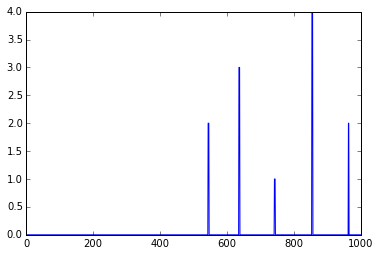

In [30]:
plt.plot(d[0,:1000])

Events are stored as 2D numpy array where the first column is the time instant and the last one is the event number. It is therefore easy to manipulate.

In [31]:
events_new = events.copy()
events_new[events_new[:, 2] == 2, 2] = 1  # matlab like syntax
events_new[events_new[:, 2] == 4, 2] = 3
print events_new[:5]
print events[:5]

[[6994    0    1]
 [7086    0    3]
 [7192    0    1]
 [7304    0    3]
 [7413    0    1]]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


In [18]:
fig = mne.viz.plot_events(events, raw.info['sfreq'],
                          raw.first_samp, event_id=dict(viz_l=3, vir_r=4, aud_l=1, aud_r=2))

Define epochs parameters:

In [20]:
event_id = dict(aud_l=1, aud_r=2)  # event trigger and conditions
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)

In [21]:
event_id

{'aud_l': 1, 'aud_r': 2}

Mark 2 channels as bad:

In [22]:
raw.info['bads'] = ['MEG 2443', 'EEG 053']
print raw.info['bads']

['MEG 2443', 'EEG 053']


The variable raw.info[‘bads’] is just a python list.

Pick the good channels:

In [23]:
picks = mne.pick_types(raw.info, meg=True, eeg=True, eog=True,
                       stim=False, exclude='bads')

Alternatively one can restrict to magnetometers or gradiometers with:

In [24]:
mag_picks = mne.pick_types(raw.info, meg='mag', eog=True, exclude='bads')
grad_picks = mne.pick_types(raw.info, meg='grad', eog=True, exclude='bads')

Define the baseline period:

In [25]:
baseline = (None, 0)  # means from the first instant to t = 0

Define peak-to-peak rejection parameters for gradiometers, magnetometers and EOG:

In [26]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)

Read epochs:

In [27]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks, baseline=baseline, reject=reject)

145 matching events found
Created an SSP operator (subspace dimension = 4)
4 projection items activated


In [41]:
# more MNE plotters ...

Reading 514 ... 619  =      3.423 ...     4.122 secs...
[done]
Applying baseline correction ... (mode: mean)
    Rejecting  epoch based on EOG : [u'EOG 061']
Reading 712 ... 817  =      4.742 ...     5.441 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 933 ... 1038  =      6.214 ...     6.913 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1132 ... 1237  =      7.539 ...     8.238 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1330 ... 1435  =      8.858 ...     9.557 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1545 ... 1650  =     10.289 ...    10.989 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1753 ... 1858  =     11.675 ...    12.374 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1948 ... 2053  =     12.973 ...    13.673 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2153 ... 2258  =     14.339 ...    15.038 secs...
[done]
App

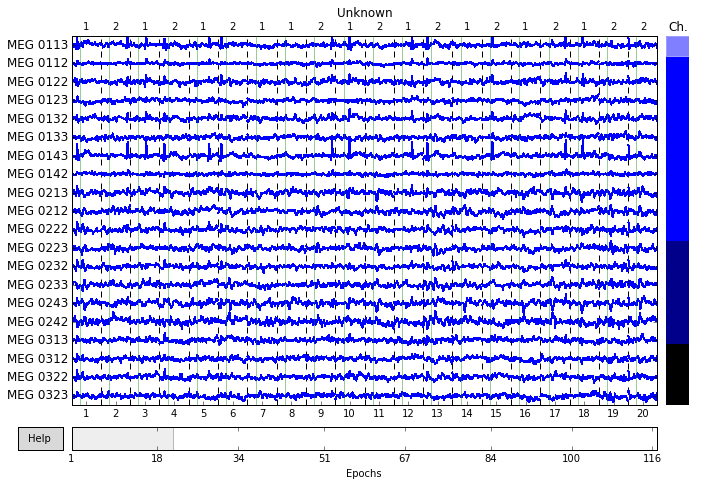

Reading 712 ... 817  =      4.742 ...     5.441 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 933 ... 1038  =      6.214 ...     6.913 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1132 ... 1237  =      7.539 ...     8.238 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1330 ... 1435  =      8.858 ...     9.557 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1545 ... 1650  =     10.289 ...    10.989 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1753 ... 1858  =     11.675 ...    12.374 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1948 ... 2053  =     12.973 ...    13.673 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2377 ... 2482  =     15.830 ...    16.530 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2572 ... 2677  =     17.129 ...    17.828 secs...
[done]
Applying baseline correction ... (mode: mean)
Read

In [28]:
% matplotlib qt4
# *new* -- *GSOC 2015*

epochs.plot()

See what channels contribute to epochs rejection:

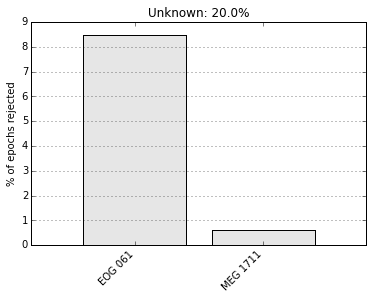

In [30]:
%matplotlib inline
epochs.drop_bad_epochs()
epochs.plot_drop_log();

In [31]:
print epochs.drop_log[:20]

[[u'EOG 061'],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [u'EOG 061'],
 ['IGNORED'],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [u'EOG 061'],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 ['IGNORED'],
 [u'EOG 061'],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [u'EOG 061'],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 ['IGNORED'],
 ['IGNORED'],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [u'EOG 061'],
 ['IGNORED'],
 [u'EOG 061'],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IGNORED'],
 [],
 ['IG

Scipy supports reading and writing of matlab files. You can save your single trials with:

In [48]:
from scipy import io
io.savemat('epochs_data.mat', dict(epochs_data=epochs.get_data()),
           oned_as='row')

or if you want to keep all the information about the data you can save your epochs in a fif file:

In [49]:
epochs.save('sample-epo.fif')

### Average the epochs to get ERF/ERP

Reading 712 ... 817  =      4.742 ...     5.441 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 933 ... 1038  =      6.214 ...     6.913 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1132 ... 1237  =      7.539 ...     8.238 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1330 ... 1435  =      8.858 ...     9.557 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1545 ... 1650  =     10.289 ...    10.989 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1753 ... 1858  =     11.675 ...    12.374 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1948 ... 2053  =     12.973 ...    13.673 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2377 ... 2482  =     15.830 ...    16.530 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2572 ... 2677  =     17.129 ...    17.828 secs...
[done]
Applying baseline correction ... (mode: mean)
Read

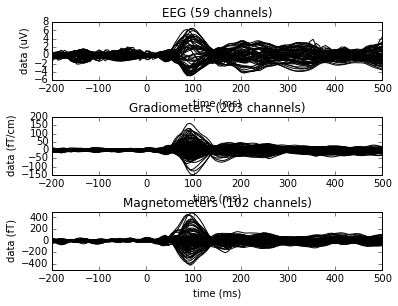

/Users/dengemann/anaconda/envs/mnedev/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


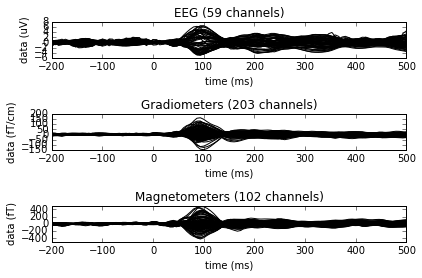

In [33]:
evoked = epochs.average()


### Now let's visualize our ERP/ERF:

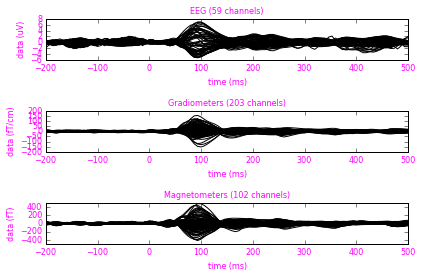

In [55]:
% matplotlib inline

fig = evoked.plot(show=False)  # butterfly plots
fig.subplots_adjust(hspace=1.0)
for text in fig.findobj(mpl.text.Text):
    text.set_fontsize(8)
    text.set_color('magenta')
fig.savefig('fede.pdf');

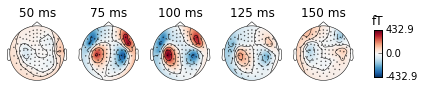

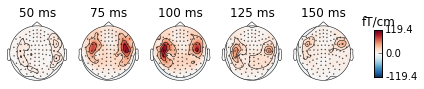

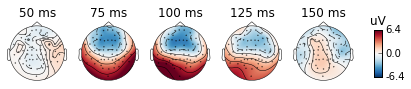

In [56]:
# topography plots
evoked.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='mag');
evoked.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='grad');
evoked.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='eeg');

### Get single epochs for one condition:

Syntax is `epochs[condition]`

Reading 712 ... 817  =      4.742 ...     5.441 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1132 ... 1237  =      7.539 ...     8.238 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1545 ... 1650  =     10.289 ...    10.989 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1948 ... 2053  =     12.973 ...    13.673 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2377 ... 2482  =     15.830 ...    16.530 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2771 ... 2876  =     18.454 ...    19.154 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 3197 ... 3302  =     21.292 ...    21.991 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 3621 ... 3726  =     24.115 ...    24.815 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 4051 ... 4156  =     26.979 ...    27.678 secs...
[done]
Applying baseline correction ... (mode: mean)
Rea

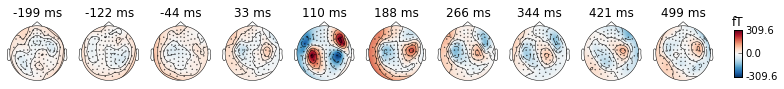

Reading 712 ... 817  =      4.742 ...     5.441 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1132 ... 1237  =      7.539 ...     8.238 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1545 ... 1650  =     10.289 ...    10.989 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1948 ... 2053  =     12.973 ...    13.673 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2377 ... 2482  =     15.830 ...    16.530 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2771 ... 2876  =     18.454 ...    19.154 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 3197 ... 3302  =     21.292 ...    21.991 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 3621 ... 3726  =     24.115 ...    24.815 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 4051 ... 4156  =     26.979 ...    27.678 secs...
[done]
Applying baseline correction ... (mode: mean)
Rea

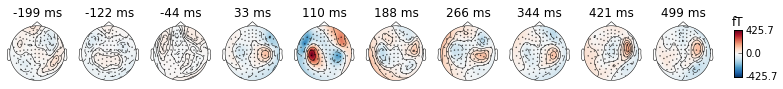

In [38]:
epochs_data = epochs['aud_l'].get_data()
print epochs_data.shape

epochs_data is a 3D array of dimension (55 epochs, 365 channels, 106 time instants).

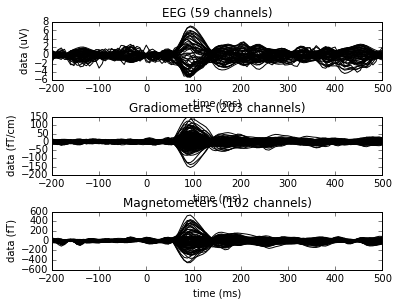

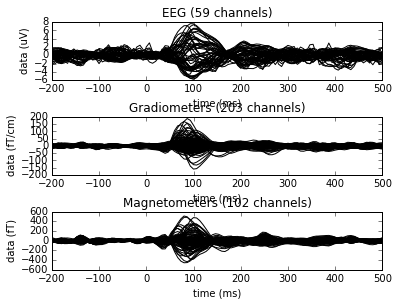

In [58]:
# Loop over conditions
for k in event_id:
    epochs[k].average().plot();

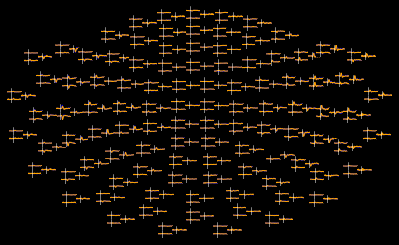

In [60]:
evokeds = [epochs[k].average() for k in event_id]
from mne.viz import plot_topo
layout = mne.find_layout(epochs.info)
plot_topo(evokeds, layout=layout, color=['blue', 'orange']);

### Write evoked data to disk

In [67]:
evoked.save('sample-ave.fif')

or to write multiple conditions in 1 file

In [68]:
mne.write_evokeds('sample-ave.fif', evokeds)
evoked.s

## Exercise:

- Recompute epochs and evoked on highpassed data without baseline. Is it different?

### Reading evoked from disk

It is also possible to read evoked data stored in a fif file:

In [69]:
evoked_fname = data_path + '/MEG/sample/sample_audvis-ave.fif'
evoked1 = mne.read_evokeds(evoked_fname, condition=0, baseline=(None, 0), proj=True)

Or another one stored in the same file:

In [70]:
evoked2 = mne.read_evokeds(evoked_fname, condition=1,
                           baseline=(None, 0), proj=True)

Or give the explicit name of the averaged condition:

In [71]:
evoked3 = mne.read_evokeds(evoked_fname, condition='Left visual',
                           baseline=(None, 0), proj=True)

### Compute a contrast:

In [40]:
# contrast = evokeds[0] - evokeds[1]
# print contrast
mne.combine_evoked?

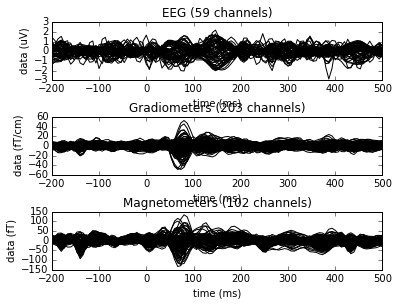

In [ ]:
fig = contrast.plot()

### Save your figure as pdf

In [ ]:
# will only work on MAC
%matplotlib qt4
import numpy as np
contrast.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='mag')
plt.savefig('toto.pdf')
!open toto.pdf

## Excercise
- Extract Epochs restricted to magnetometers on unfiltered data (sample_audvis_raw.fif)
- What is the effect of setting proj=True or proj=False in Epochs?
- Add ECG projections to raw with raw.add_proj. Do you get rid of ECG?

In [56]:
raw.add_proj?